##### 1. 라이브러리 로드

In [1]:
import sys
import os
sys.path.append("C:/Users/SM/dir_/FontProject/_석사코드정리_학제간연구용/3. 유사폰트추천코드/img2vec/img2vec_pytorch")  # Adds higher directory to python modules path.
from img_to_vec import Img2Vec
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

##### 2. 획요소 특징 벡터 추출

In [2]:
model_list=["inception"]
font_vector = []
stroke_vector_merged = [[''] for row in range(13)]

for model_name in model_list:
    print(model_name)   

    ### 획요소 '삐침' 경로
    input_path = 'C:/Users/SM/Desktop/2022-2 졸업프로젝트/Text Rendering/훈민정음(183)'
    
    #이미지 특징 추출할 모델 로드(resnet-18, alexnet)
    img2vec =Img2Vec(model=model_name)
    
    #리스트에 각 이미지 For each test image, we store the image in a list
    list_pics = []
    filenames = []
    for file in os.listdir(input_path):
        filename = os.fsdecode(file)
        img1 = Image.open(os.path.join(input_path, filename))
        list_pics.append(img1)
        filenames.append(filename)
    

    vectors = img2vec.get_vec(list_pics)
    pics1 = {}
    for i, vec in enumerate(vectors):
        pics1[filenames[i]] = vec

inception
AdaptiveAvgPool2d(output_size=(1, 1))
(183, 2048)


In [12]:
import pandas as pd
vectored_img = pics1
df = pd.DataFrame(vectored_img).transpose()

# 인덱스 변경
df.reset_index().rename(columns={"index":"fontname"})
df = df.rename_axis('fontname').reset_index()
df

,fontname,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,10X10.png,0.162344,0.072639,0.0,0.071649,0.113643,0.0,0.027752,0.940782,0.000000,...,0.173122,0.338345,0.156152,0.467906,1.086459,0.034562,0.112481,0.218683,0.000000,0.436056
1,10X10Bold.png,0.059656,0.094550,0.0,0.054257,0.128174,0.0,0.050180,0.997975,0.000000,...,0.406650,0.677715,0.274354,0.406857,1.135844,0.032004,0.142800,0.254033,0.000000,0.568965
2,12롯데마트드림Bold.png,0.259357,0.098155,0.0,0.102086,0.045733,0.0,0.008269,0.712453,0.000000,...,0.503496,0.628383,0.151202,0.326762,0.746957,0.006045,0.224233,0.226173,0.016634,0.368034
3,12롯데마트드림Light.png,0.202112,0.039531,0.0,0.046871,0.108254,0.0,0.058589,0.954645,0.000563,...,0.577851,0.191975,0.093019,0.786884,0.237999,0.000000,0.138327,0.155190,0.004588,0.245521
4,12롯데마트드림Medium.png,0.314670,0.081114,0.0,0.061485,0.054342,0.0,0.015997,1.052015,0.003280,...,0.396065,0.473781,0.129454,0.553760,0.616268,0.000000,0.199045,0.150493,0.023428,0.297208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,해수체L.png,0.299807,0.025787,0.0,0.067842,0.040457,0.0,0.031880,0.761541,0.002004,...,0.421848,0.220590,0.089198,0.785730,0.306494,0.000106,0.161101,0.095361,0.000185,0.188188
179,해수체M.png,0.244255,0.027511,0.0,0.044235,0.069747,0.0,0.012347,0.861827,0.014466,...,0.311054,0.252708,0.154526,0.540183,0.722503,0.018250,0.137016,0.114783,0.007693,0.284924
180,헬스셋고딕Bold.png,0.079232,0.087465,0.0,0.099987,0.170077,0.0,0.047782,1.071488,0.040481,...,0.470854,0.257811,0.143119,0.539361,0.970268,0.016219,0.128455,0.157152,0.001490,0.444278
181,헬스셋고딕Light.png,0.072585,0.124502,0.0,0.065807,0.119652,0.0,0.012994,1.055624,0.000000,...,0.419829,0.121637,0.078707,0.620715,0.517058,0.040942,0.075296,0.199016,0.000000,0.400929


### 3. K-means clustering
##### 3-1. 스케일링

In [4]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array(df.values.tolist())
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(X)

##### 4-2. k 평균 군집화 학습

In [15]:
k = 5
model = KMeans(n_clusters=k, random_state=0)
model.fit(data_scale)

KMeans(n_clusters=5, random_state=0)

##### 4-3. 군집화 결과

In [16]:
df['cluster'] = model.fit_predict(data_scale)
print(model.labels_)
df

[1 1 1 4 1 0 1 1 1 1 1 1 1 1 1 3 4 4 1 3 4 0 4 0 0 4 3 4 4 3 1 2 2 4 1 1 3
 4 3 1 2 1 0 4 1 1 0 4 4 3 0 1 1 1 1 3 3 4 0 1 4 4 4 4 4 1 1 1 1 1 4 1 4 1
 3 3 2 2 1 4 4 1 1 1 1 4 1 4 4 3 1 4 4 4 3 3 3 4 3 2 2 2 2 2 3 3 3 3 3 3 3
 1 2 2 0 0 4 0 1 1 1 4 4 1 4 1 1 4 4 2 2 2 2 3 3 3 1 4 0 0 4 4 4 1 3 4 4 4
 4 3 4 4 4 3 1 2 0 1 1 1 1 4 4 1 1 1 4 1 1 4 4 4 0 4 1 1 4 1 4 4 1 4 0]


,fontname,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,cluster
0,10X10.png,0.162344,0.072639,0.0,0.071649,0.113643,0.0,0.027752,0.940782,0.000000,...,0.338345,0.156152,0.467906,1.086459,0.034562,0.112481,0.218683,0.000000,0.436056,1
1,10X10Bold.png,0.059656,0.094550,0.0,0.054257,0.128174,0.0,0.050180,0.997975,0.000000,...,0.677715,0.274354,0.406857,1.135844,0.032004,0.142800,0.254033,0.000000,0.568965,1
2,12롯데마트드림Bold.png,0.259357,0.098155,0.0,0.102086,0.045733,0.0,0.008269,0.712453,0.000000,...,0.628383,0.151202,0.326762,0.746957,0.006045,0.224233,0.226173,0.016634,0.368034,1
3,12롯데마트드림Light.png,0.202112,0.039531,0.0,0.046871,0.108254,0.0,0.058589,0.954645,0.000563,...,0.191975,0.093019,0.786884,0.237999,0.000000,0.138327,0.155190,0.004588,0.245521,4
4,12롯데마트드림Medium.png,0.314670,0.081114,0.0,0.061485,0.054342,0.0,0.015997,1.052015,0.003280,...,0.473781,0.129454,0.553760,0.616268,0.000000,0.199045,0.150493,0.023428,0.297208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,해수체L.png,0.299807,0.025787,0.0,0.067842,0.040457,0.0,0.031880,0.761541,0.002004,...,0.220590,0.089198,0.785730,0.306494,0.000106,0.161101,0.095361,0.000185,0.188188,4
179,해수체M.png,0.244255,0.027511,0.0,0.044235,0.069747,0.0,0.012347,0.861827,0.014466,...,0.252708,0.154526,0.540183,0.722503,0.018250,0.137016,0.114783,0.007693,0.284924,4
180,헬스셋고딕Bold.png,0.079232,0.087465,0.0,0.099987,0.170077,0.0,0.047782,1.071488,0.040481,...,0.257811,0.143119,0.539361,0.970268,0.016219,0.128455,0.157152,0.001490,0.444278,1
181,헬스셋고딕Light.png,0.072585,0.124502,0.0,0.065807,0.119652,0.0,0.012994,1.055624,0.000000,...,0.121637,0.078707,0.620715,0.517058,0.040942,0.075296,0.199016,0.000000,0.400929,4


### 4-1. K-means 클러스터링 k 결정 (Elbow Method)

dict_keys(['ax', 'estimator', 'k', 'locate_elbow', 'metric', 'timings']) 




c:\Users\SM\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=14), k=None)

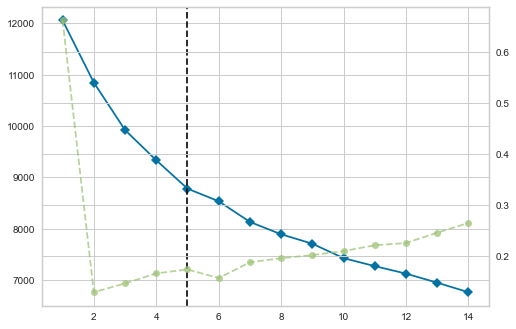

In [17]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 15))
visualizer.fit(data_scale)

In [18]:
clustering_result = []
for cluster_group in range(k):
  fontlist_of_each_cluster = df[df['cluster'] == cluster_group]['fontname'].values.tolist()
  clustering_result.append(fontlist_of_each_cluster)

for cluster_group in range(k):
  print("group " + str(cluster_group), clustering_result[cluster_group])

group 0 ['12롯데마트행복Bold.png', '20956073_SuncheonB_TTF.png', '20958979_UTOIMAGE_유토이미지_TTF.png', '20958981_UTOIMAGE_유토이미지고딕_B_TTF.png', 'BMDOHYEON_ttf.png', 'BMJUA_ttf.png', 'DXBangtango-KSCpc-EUC-H.png', 'DXMgoRB-KSCpc-EUC-H.png', 'locus_sangsang.png', 'netmarbleB.png', 'netmarbleM.png', 'THE명품굴림B.png', 'TmonMonsori.png', '산돌독수리Bold.png', '타이포도담체.png', '휴먼옛체.png']
group 1 ['10X10.png', '10X10Bold.png', '12롯데마트드림Bold.png', '12롯데마트드림Medium.png', '12롯데마트행복Light.png', '12롯데마트행복Medium.png', '20835804_도서관체_ttf.png', '20835814_SungDongGothicEB_ttf.png', '20835815_SungDongGothicB_ttf.png', '20950864_경기천년제목TTF_Bold.png', '20950866_경기천년제목TTF_Medium.png', '20950867_경기천년제목TTFV_Bold.png', '20950870_경기천년바탕TTF_Bold.png', '20950918_빛고을광주_Bold_TTF.png', 'Atomy-Bold.png', 'a타이틀고딕3.png', 'a타이틀고딕4.png', 'BinggraeMelona-Bold.png', 'BinggraeⅡ.png', 'BMHANNAPro.png', 'BMHANNA_11yrs_ttf.png', 'DXBomgExtraBold-KSCpc-EUC-H.png', 'DXBrmRExtraBold-KSCpc-EUC-H.png', 'DXFrtyB-KSCpc-EUC-H.png', 'DXHead02B-KSCpc-EUC-H.

In [22]:
from fileinput import filename
import os
import shutil

file_path = 'Text Rendering/훈민정음(183)/'
file_names = os.listdir(file_path)
os.mkdir('Text Rendering/훈민정음(183)/클러스터링 결과')

k=5
for cluster_idx in range(k):
  cluster_result_file = file_path + '클러스터링 결과/group' + str(cluster_idx)
  os.mkdir(cluster_result_file)

copy_complete_font=0
for file_name in file_names:
  for cluster_idx in range(k):
    if file_name in clustering_result[cluster_idx]:
      new_path = file_path + '클러스터링 결과/group' + str(cluster_idx)
      shutil.copy(file_path+file_name, new_path)
      copy_complete_font+=1

print(copy_complete_font)

183
